## SVR支持向量机回归
* https://www.jianshu.com/p/58dfbb9d047e
* https://scikit-learn.org/dev/modules/svm.html#svm-implementation-details
* 在线性回归中我们是让MSE的值达到最小，与线性回归不同，SVR能容忍模型输出与真实值最多有的误差，只有模型输出与真实值的误差超过时才去计算损失值。如图所示，这相当于以回归直线为中心，构建了一个宽度为$2\epsilon$的间隔带，只要训练样本落入此间则认为预测是准确的，否则才去计算损失值。
\begin{align}\begin{aligned}\min_ {w, b, \zeta, \zeta^*} \frac{1}{2} w^T w + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\\begin{split}\textrm {subject to } & y_i - w^T \phi (x_i) - b \leq \varepsilon + \zeta_i,\\
                      & w^T \phi (x_i) + b - y_i \leq \varepsilon + \zeta_i^*,\\
                      & \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}\end{aligned}\end{align}

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

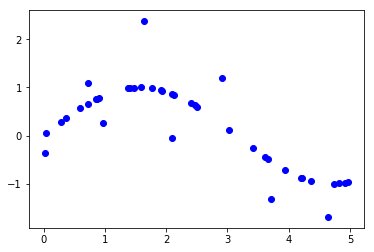

In [18]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)  #产生40组数据，每组一个数据，axis=0决定按列排列，=1表示行排列
y = np.sin(X).ravel()   #np.sin()输出的是列，和X对应，ravel表示转换成行
y[::5] += 3 * (0.5 - np.random.rand(8))
plt.scatter(X, y, color='b')

In [19]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

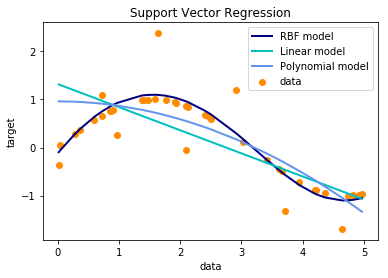

In [21]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()